# Exercise 1 : the MNIST dataset

In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt

In [2]:
# input image dimensions are known
img_rows, img_cols = 28, 28

num_classes = 10
batch_size = 128
epochs = 12

In [3]:
# load mnist dataset (available as a part of your Keras installation)
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# visualize some data
print('x_train: ',x_train)
print('y_train: ',y_train)
print('x_test: ',x_test)
print('y_test: ',y_test)
print('x_train size: ',x_train.size)
print('x_test size: ',x_test.size)

x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y_train:  [5 0 4 ... 5 6 8]
x_test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ..

In [5]:
# reshape the data arrays to have a single channel. default mode : channel_last
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# normalize the pixel values: rescale them to the range [0,1]

# i) convert the data type from unsigned integers to float32 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# ii) divide the pixel values by the max intensity value

# b = np.linalg.norm(x_train) #to get the norme of x_train
maxIVxt = np.amax(x_train)# get the maximal value of x_train
x_train = x_train/maxIVxt

maxIVxt = np.amax(x_test)# get the maximal value of x_train
x_test = x_test/maxIVxt

In [16]:
# convert class vectors to binary class matrices using keras.utils.to_categorical
x_train = keras.utils.to_categorical(x_train,dtype = "bool")
x_test = keras.utils.to_categorical(x_test,dtype = "bool")
print(x_train)
print(x_test)

MemoryError: Unable to allocate 89.7 GiB for an array with shape (12042240000,) and data type int64

In [15]:
# a baseline CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
# compile the model using model.compile() with loss : categorical crossentropy, optimizer : adadelta, metrics : accuracy

model.compile()

# fit model using model.fit() using 20% of train set as validation set

model.fit() 

# plot the learning curves. hint : history = model.fit()

history = model.fit()

# evaluate model using model.evaluate()
model.evaluate()

# Exercise 2 : dogs vs cats

In [10]:
import os
from matplotlib.image import imread
import random
import numpy as np

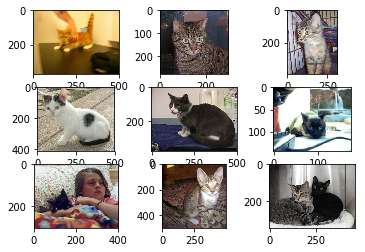

In [12]:
# define location of dataset
folder = '../catsDogsSmall'

# display some photos of dogs and  cats
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
    
# show the figure
plt.show()

In [13]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

'''
Load all of the images, resize them, and store them as a numpy array. 
The label is determined for each photo based on the filenames; labels are stored as a numpy array.
'''

photos, labels = list(), list()

# target_size
img_height = 200
img_width = 200

for file in os.listdir(folder):
    
    # determine the class (binary problem)
    #------
    # TO-DO
    #------
    
    # load photos using load_img()
    #------
    # TO-DO
    #------
    
    # convert to numpy array using img_to_array()
    #------
    # TO-DO
    #------
    
    # append
    #------
    # TO-DO
    #------

# convert to numpy arrays
#------
# TO-DO
#------

In [14]:
from sklearn.model_selection import train_test_split

# split data into train, validation and test sets
#------
# TO-DO
#------

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# use ImageDataGenerator and ImageDataGenerator.flow() to create train, validation, and test iterators 
# refer to the documentation: https://keras.io/api/preprocessing/image/
#------
# TO-DO
#------

In [16]:
# define a cnn model
def define_cnn_model():
    # model architecture
    #------
    # TO-DO
    #------
    return model

In [17]:
# compile model using model.compile() 
#------
# TO-DO
#------

# fit model using model.fit()
#------
# TO-DO
#------

# plot the learning curves
#------
# TO-DO
#------

# evaluate model using model.evaluate()
#------
# TO-DO
#------

In [18]:
# transfer learning using VGG16 model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.optimizers import SGD

def transfer_model():
    # load VGG16 model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model